# Definitions

**Multiple regression** extends simple linear regression to allow for multiple independent (X) variables:  
- to assess the impact of one variable after accounting for others,
- to create an equation for making useful predictions,
- to understand scientifically how much changes in each of several variables contribute to explaining an outcome of interest.  

Multiple linear regression --> the outcome variable is continuous.  
Logistic regression --> binary outcome.  
Proportional hazards regression --> survival times.

A regression model predicts one variable Y from one or more other variables X.  
The Y variable is called *dependent variable*, *the response variable*, or *the outcome variable*.  
The X variables are called *independent variables*, *explanatory variables*, or *predictor variables*.  
Each independent variable can be:
+ continuous (e.g. age, blood pressure, weight)
+ binary/dummy variable (e.g. code for gender)
+ categorical with 3 or more categories (e.g. school classes, countries)

The multiple regression model defines the dependent variables as a function of the independent variables and a set of parameters or *regression coefficients*. Regression methods find the values of each parameter that make the model predictions come as close as possible to the data. This approach is analoguous to linear regression.  
Multiple regression is also called *multivariable regression* refering to models with 2 or more X variables.

Methods exist that can simultaneously analyze several outcomes (Y variables) at once = *multivariate methods*, e.g. factor analysis, cluster analysis, PCA and MANOVA. *Univariate methods* deal witha single Y.

# Data

We will use the data from the MOOC 'Introducton à la statistique avec R' which deals with multiple regression.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [22]:
data = pd.read_csv('./data/smp2.csv', delimiter=';')
data.head()

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,abus,grav.cons,dep.cons,ago.cons,ptsd.cons,alc.cons,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0
2,50.0,prof.intermediaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,0.0,2.0,1,0,0,0,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 26 columns):
age             797 non-null float64
prof            793 non-null object
duree           576 non-null float64
discip          793 non-null float64
n.enfant        773 non-null float64
n.fratrie       799 non-null int64
ecole           794 non-null float64
separation      788 non-null float64
juge.enfant     794 non-null float64
place           792 non-null float64
abus            792 non-null float64
grav.cons       795 non-null float64
dep.cons        799 non-null int64
ago.cons        799 non-null int64
ptsd.cons       799 non-null int64
alc.cons        799 non-null int64
subst.cons      799 non-null int64
scz.cons        799 non-null int64
char            703 non-null float64
rs              696 non-null float64
ed              692 non-null float64
dr              688 non-null float64
suicide.s       758 non-null float64
suicide.hr      760 non-null float64
suicide.past    785 no

## Simple linear regression

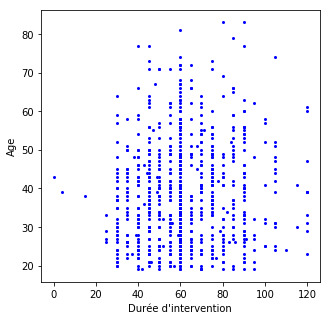

In [27]:
plt.figure(figsize=(5,5)).gca()
plt.plot(data['dur.interv'], data['age'], 'bo', markersize=2, linestyle='None')
plt.ylabel('Age')
plt.xlabel("Durée d'intervention");

In [115]:
data_ = data.dropna(subset=['age', 'dur.interv']) # drop any Nan in the indicated subset
y = data_['age']
X = data_['dur.interv']

X = sm.add_constant(X)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.516
Date:                Fri, 19 Oct 2018   Prob (F-statistic):             0.0191
Time:                        20:57:19   Log-Likelihood:                -2991.2
No. Observations:                 747   AIC:                             5986.
Df Residuals:                     745   BIC:                             5996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4908      1.611     22.026      0.0

## Multiple linear regression

Let's compute of the parameters for independent variables *age*, *dep.cons*, *subst.cons* and *scz.cons* using the model:
$$
Y_i = \beta_0 + \beta_1.X_{i, age} + \beta_2.X_{i, dep.cons} + \beta_3.X_{i, subst.cons} + \beta_4.X_{i, scz.cons} + \epsilon_i
$$
with subscript _i_ refering to the particular participant, and with the 3 last variables designated as **dummy variables** because those values were chosen arbitrarily to designate two groups (yes or no).

Each regression coefficient represents the average change in Y when we change the corresponding X value by 1.0. For example, $\beta_4$ is the average difference in Y between those who have _scz.cons_ and those who don't.  
The intercept $\beta_0$ is the predicted average value of Y when all the X values are zero, and might only have a mathematical meaning.

In [92]:
data_ = data.dropna(subset=['dur.interv', 'age', 'dep.cons', 'subst.cons', 'scz.cons'])
y = data_['dur.interv']
X = data_[['age', 'dep.cons', 'subst.cons', 'scz.cons']]

X = sm.add_constant(X)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             dur.interv   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     11.49
Date:                Fri, 19 Oct 2018   Prob (F-statistic):           4.69e-09
Time:                        16:33:56   Log-Likelihood:                -3260.7
No. Observations:                 747   AIC:                             6531.
Df Residuals:                     742   BIC:                             6554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9011      2.622     18.649      0.0

The investigator's goal was to answer the question, after adjusting for effects of the other variables, is there a substantial linear relationship between the *age* and *dur.interv*.  
The best-fit value of $\beta_1$ was 0.2210. This means that, on average, and after accounting for differences in the other variables, an increase in *age* of one unit is associated with an increase of *dur.interv* of 0.2210. The 95% CI ranges from 0.109 to 0.333.  
For the dummy variables, for example *dep.cons*, $\beta_2$ was 7.3893. That variable is coded as zero if the participant had no *dep.cons* and 1 if he had. Therefore, on average, participant who had *dep.cons* had an *dur.interv* that was 7.389 units higher that of participants who had not.

### Statistical significance

Multiple regression computes a P value for each parameter in the model testing the null hypothesis that the true value of that parameter is zero. Why zero? When a regression coefficient equals zero, then the corresponding independent variable has **no effect in the model**.  
The CI of $\beta_4$ runs from a negative to a positive number, including the value defining H0, then the P value must be greater thant 0.05.

$R²$ equals 0.058, this means that only 5.8% of the variability in Y is explained by the model.  
With multiple regression models which have more than two independent variables, we cannot visualize the best-fit line superimposed on the data. A way to visualize how well a multiple regression model fit the data is presented below.  
For each point/participant, the prediction is computed from the other variables for that participant and the best-fit parameter values.

In [79]:
data_['pred'] = est.predict(X)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


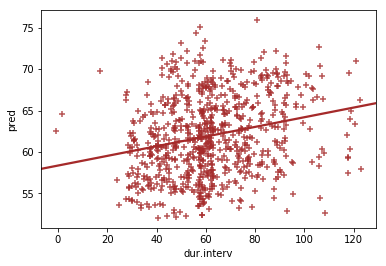

In [76]:
import seaborn as sns
sns.regplot('dur.interv', 'pred', data=data_, ci=None, marker='+', 
            x_jitter=3, y_jitter=2, color='brown');

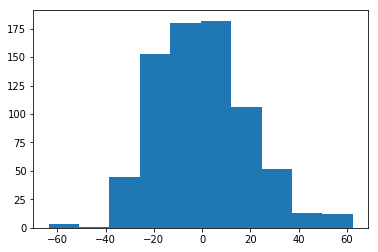

In [95]:
plt.hist(est.resid, bins=10); # one of the validity condition for the multiple regression is
# the absence of evident correlative structure in the distribution of the noise (residues)

In [50]:
from scipy import stats

In [53]:
Rsq = stats.pearsonr(data_['dur.interv'], data_['pred'])[0]**2
print(Rsq)

0.058329849335087426


The predicted and actual data values are correlated, with $R²$ equal to 0.058. By definition this is identical to the overall $R²$ computed by multiple regression!

Even if the independent variables are completely unable to predict the dependent variable, $R²$ will be greater than zero, limiting the usefulness of $R²$ as a way to quantify goodness of fit, especially with small sample sizes.  
Adjusted $R²$ estimates how well the model is expected to fit new data. This measure accounts for the number od independent variables and is always smaller than $R²$.
$$
R^2_{adj} = 1 - \left[\frac{(1-R²)(n-1)}{n-k-1}\right]
$$

In [66]:
n = est.nobs
k = len(est.params) - 1 # minus 'const'
Rsq_adj = 1 - ((1-Rsq)*(n-1)) / (n-k-1)
print(f"R² adjusted = {Rsq_adj:4.3f}")

R² adjusted = 0.053


Rules of thumb specify that the number of participants (n) should be somewhere between 10-40 times the number of variables (k). With ca. 800 participants, we may analyze 20 independent variables.

### Selection of the variable?

The authors of the example presented in the chapter 37 of Intuitive Biostatistics 4th stated that the collected data for more variables for each participant and that the fit of the model was not improved when the model also account for smoking, mean blood pressure, residence in urban vs. rural etc. Consequently, the omitted these variables from the model whose fit they reported. In other words they computed a P value for each independent variable in the model, removed variables for which P values were greater than 0.05 and then reran the model wothout those variables (backward-stepwise selection of step-down).  

Deciding how to construct models is a difficult problem...

In [80]:
data.columns

Index(['age', 'prof', 'duree', 'discip', 'n.enfant', 'n.fratrie', 'ecole',
       'separation', 'juge.enfant', 'place', 'abus', 'grav.cons', 'dep.cons',
       'ago.cons', 'ptsd.cons', 'alc.cons', 'subst.cons', 'scz.cons', 'char',
       'rs', 'ed', 'dr', 'suicide.s', 'suicide.hr', 'suicide.past',
       'dur.interv'],
      dtype='object')

In [81]:
# let's try to fit the data with more variables
var = ['age', 'n.enfant', 'grav.cons', 'dep.cons', 'ago.cons', 'alc.cons', 
       'subst.cons', 'scz.cons']
data_ = data.dropna(subset=['dur.interv']+var)

y = data_['dur.interv']
X = data_[var]

X = sm.add_constant(X)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.071    
Dependent Variable: dur.interv       AIC:                6310.4284
Date:               2018-10-19 15:40 BIC:                6351.6667
No. Observations:   722              Log-Likelihood:     -3146.2  
Df Model:           8                F-statistic:        7.891    
Df Residuals:       713              Prob (F-statistic): 3.33e-10 
R-squared:          0.081            Scale:              361.38   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          44.2043    3.1398  14.0788  0.0000  38.0400  50.3687
age             0.1943    0.0636   3.0545  0.0023   0.0694   0.3192
n.enfant        0.8929    0.4232   2.1100  0.0352   0.0621   1.7236
grav.cons       1.3273    0.5282   2.5126  0.0122   0.2902   2.3644
dep.co

## Interactions among independent variables

What if the effects of one variable matter more with another variable? To include interaction between 2 variables, add a new term in the model equation with a new parameter multiplyied by the product of e.g. dep.cons ($X_2$) times subst.cons ($X_3$):
$$
Y_i = \beta_0 + \beta_1.X_{i, age} + \beta_2.X_{i, dep.cons} + \beta_3.X_{i, subst.cons} + \beta_4.X_{i, scz.cons} + \beta_{2,3}.X_{i, dep.cons}.X_{i, subst.cons} + \epsilon_i
$$

In [103]:
# let's try to fit the data with more variables
var = ['age', 'dep.cons', 'subst.cons', 'scz.cons']
data_ = data.dropna(subset=['dur.interv']+var)
data_['interaction'] = data['dep.cons']*data['subst.cons'] # math multiplication

y = data_['dur.interv']
X = data_[var+['interaction']]

X = sm.add_constant(X)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.054    
Dependent Variable: dur.interv       AIC:                6531.3868
Date:               2018-10-19 16:56 BIC:                6559.0831
No. Observations:   747              Log-Likelihood:     -3259.7  
Df Model:           5                F-statistic:        9.588    
Df Residuals:       741              Prob (F-statistic): 7.02e-09 
R-squared:          0.061            Scale:              364.17   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          49.5169    2.6579  18.6303  0.0000  44.2991  54.7348
age             0.2173    0.0571   3.8045  0.0002   0.1052   0.3294
dep.cons        6.1578    1.6977   3.6270  0.0003   2.8248   9.4908
subst.cons      3.1724    2.2985   1.3802  0.1679  -1.3399   7.6848
scz.co

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


ATTENTION, the effects of the single variables of the interaction cannont be interpreted...

### patsy formula (R-style)

In [138]:
import statsmodels.formula.api as smf
#statsmodels allows users to fit statistical models using R-style formulas. Internally, statsmodels uses the patsy 
#package to convert formulas and data to the matrices that are used in model fitting.

model = smf.ols(formula=                                            # V
                "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons'):Q('subst.cons')", 
                data=data_)
# Q() is a way to ‘quote’ variable names, especially ones that do not otherwise 
# meet Python’s variable name rules, such as with a dot in the variable name

#“:” adds a new column to the design matrix with the product of the other two columns.
#“*” will also include the individual columns that were multiplied together:

results = model.fit()
print(results.summary2()) # R-style formula just works the same!

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.040    
Dependent Variable:      Q('dur.interv')     AIC:                   6540.6674
Date:                    2018-10-20 14:24    BIC:                   6559.1317
No. Observations:        747                 Log-Likelihood:        -3266.3  
Df Model:                3                   F-statistic:           11.38    
Df Residuals:            743                 Prob (F-statistic):    2.66e-07 
R-squared:               0.044               Scale:                 369.70   
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                     52.6832   2.3309 22.6022 0.0000 48.1073 57.2591
age                            0.1966   0.0545  3.6083 0.0003  0.0896  0.3036
Q('scz.co

In [139]:
model = smf.ols(formula=                                            # V
                "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons')*Q('subst.cons')", 
                data=data_)

#“:” adds a new column to the design matrix with the product of the other two columns.
#“*” will also include the individual columns that were multiplied together:

results = model.fit()
print(results.summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.054    
Dependent Variable:      Q('dur.interv')     AIC:                   6531.3868
Date:                    2018-10-20 14:24    BIC:                   6559.0831
No. Observations:        747                 Log-Likelihood:        -3259.7  
Df Model:                5                   F-statistic:           9.588    
Df Residuals:            741                 Prob (F-statistic):    7.02e-09 
R-squared:               0.061               Scale:                 364.17   
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                     49.5169   2.6579 18.6303 0.0000 44.2991 54.7348
age                            0.2173   0.0571  3.8045 0.0002  0.1052  0.3294
Q('scz.co

#### removal of the intercept parameter

In [136]:
# intercept automatically added using patsy formula, can be removed usng -1
model = smf.ols(formula=
                "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons'):Q('subst.cons') -1", 
                data=data_)
results = model.fit()
print(results.summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.853    
Dependent Variable:      Q('dur.interv')     AIC:                   6929.5606
Date:                    2018-10-20 14:23    BIC:                   6943.4087
No. Observations:        747                 Log-Likelihood:        -3461.8  
Df Model:                3                   F-statistic:           1441.    
Df Residuals:            744                 Prob (F-statistic):    2.40e-309
R-squared:               0.853               Scale:                 623.06   
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
age                            1.3579   0.0235 57.7363 0.0000  1.3118  1.4041
Q('scz.cons')                  6.6538   3.2980  2.0175 0.0440  0.1793 13.1283
Q('dep.co

We can also use functions like in $y$ ~ $a + a:b + np.log(x)$

### Categorical variable > 2 classes

In [113]:
# let's introduce the categorical variable 'prof'
data['prof'].describe()

count         793
unique          8
top       ouvrier
freq          227
Name: prof, dtype: object

#### using pd.get_dummies

In [154]:
# preparation of the subset, i.e. selection of the variables and dropna
var = ['age', 'dep.cons', 'subst.cons', 'scz.cons', 'prof']
df = data.dropna(subset=['dur.interv']+var)

# getting dummies
dummies = pd.get_dummies(df['prof'], drop_first=True)
data_ = pd.concat([df, dummies], axis=1)

In [155]:
data_.columns

Index(['age', 'prof', 'duree', 'discip', 'n.enfant', 'n.fratrie', 'ecole',
       'separation', 'juge.enfant', 'place', 'abus', 'grav.cons', 'dep.cons',
       'ago.cons', 'ptsd.cons', 'alc.cons', 'subst.cons', 'scz.cons', 'char',
       'rs', 'ed', 'dr', 'suicide.s', 'suicide.hr', 'suicide.past',
       'dur.interv', 'artisan', 'autre', 'cadre', 'employe', 'ouvrier',
       'prof.intermediaire', 'sans emploi'],
      dtype='object')

In [157]:
var = ['age', 'dep.cons', 'subst.cons', 'scz.cons', 
        'artisan', 'autre', 'cadre', 'employe', 'ouvrier',
       'prof.intermediaire', 'sans emploi']

y = data_['dur.interv']
X = data_[var]

X = sm.add_constant(X)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.052    
Dependent Variable:   dur.interv       AIC:                6504.1550
Date:                 2018-10-20 14:39 BIC:                6559.4834
No. Observations:     743              Log-Likelihood:     -3240.1  
Df Model:             11               F-statistic:        4.692    
Df Residuals:         731              Prob (F-statistic): 5.82e-07 
R-squared:            0.066            Scale:              365.04   
--------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------
const               62.7920  10.2078  6.1514 0.0000  42.7519 82.8321
age                  0.2129   0.0588  3.6180 0.0003   0.0974  0.3284
dep.cons             7.3679   1.4584  5.0521 0.0000   4.5048 10.2311
subst.cons           5.3459   1.7690  3.0220 0.0026  

#### using patsy

In [123]:
var = ['age', 'dep.cons', 'subst.cons', 'scz.cons', 'prof']
data_ = data.dropna(subset=['dur.interv']+var)

y = data_['dur.interv']
X = data_[var]

model = smf.ols(formula="Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q(\
                'scz.cons') + prof", data=data_)
#patsy determined that elements of 'prof' were text strings, so it treated Prof as a categorical 
#variable. patsy’s default is also to include an intercept, so we automatically dropped one 
# of the Prof categories

est = model.fit()
print(est.summary2())

                      Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.052    
Dependent Variable:     Q('dur.interv')     AIC:                   6504.1550
Date:                   2018-10-19 21:12    BIC:                   6559.4834
No. Observations:       743                 Log-Likelihood:        -3240.1  
Df Model:               11                  F-statistic:           4.692    
Df Residuals:           731                 Prob (F-statistic):    5.82e-07 
R-squared:              0.066               Scale:                 365.04   
----------------------------------------------------------------------------
                            Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------------------
Intercept                   62.7920  10.2078  6.1514 0.0000  42.7519 82.8321
prof[T.artisan]            -11.4851   9.8294 -1.1685 0.2430 -30.7823  7.8120
prof[T.autre]         

#### relevel

Using pc.get_dummies it is possible to not drop_first and then drop the new reference.

In [158]:
model = smf.ols(formula="Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q(\
                'scz.cons') + C(prof, Treatment(reference='ouvrier'))", data=data_)
# If prof had been an integer variable that we wanted to treat explicitly as categorical, we 
# could have done so by using the C() operator, which by the way utilizes the Treatment relevel()

est = model.fit()
print(est.summary2())

                                       Results: Ordinary least squares
Model:                              OLS                            Adj. R-squared:                   0.052    
Dependent Variable:                 Q('dur.interv')                AIC:                              6504.1550
Date:                               2018-10-20 14:45               BIC:                              6559.4834
No. Observations:                   743                            Log-Likelihood:                   -3240.1  
Df Model:                           11                             F-statistic:                      4.692    
Df Residuals:                       731                            Prob (F-statistic):               5.82e-07 
R-squared:                          0.066                          Scale:                            365.04   
--------------------------------------------------------------------------------------------------------------
                                         